In [3]:
import networkx as nx


## graph for Source 

In [36]:
import random

def get_source(sourcename : str):
    
    G = nx.Graph(app=sourcename)

    G.add_nodes_from([
        (1, {'name':'silverman', 'internal':True}),
        (2, {'name':'goldman', 'internal':True}),
    ])
    
    for i in range(3, 10):
        name = sourcename + '_contact_' + str(i)
        di = {'name' :  name, 'internal' : False}
        G.add_nodes_from([(i, di)])
        
    
    for i in random.sample(range(3, 10), 5):
        G.add_edges_from([(1, i)])
    for i in random.sample(range(3, 10), 5):
        G.add_edges_from([(2, i)])
    
    return G

## Print graph info

In [37]:

G = get_source('source1')
H = get_source('source2')

print(G.graph, G.nodes, G.edges)

for e in G.adj[1]:
    print(G.nodes[e])
    
print('nodes=', G.number_of_nodes(), ' edges=', G.number_of_edges())

{'app': 'source1'} [1, 2, 3, 4, 5, 6, 7, 8, 9] [(1, 4), (1, 6), (1, 3), (1, 9), (1, 7), (2, 3), (2, 8), (2, 6), (2, 7), (2, 9)]
{'name': 'source1_contact_4', 'internal': False}
{'name': 'source1_contact_6', 'internal': False}
{'name': 'source1_contact_3', 'internal': False}
{'name': 'source1_contact_9', 'internal': False}
{'name': 'source1_contact_7', 'internal': False}
nodes= 9  edges= 10


## Merge graphs from 2 sources

In [38]:
K = nx.compose(G, H)

## visualize 

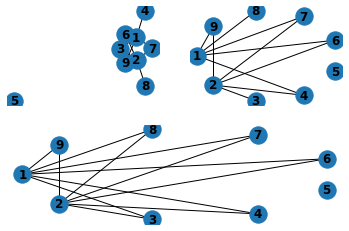

In [39]:
import matplotlib.pyplot as plt

plt.subplot(221)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(222)
nx.draw_shell(H, with_labels=True, font_weight='bold')

plt.subplot(212)
nx.draw_shell(K, with_labels=True, font_weight='bold')

## save graph

In [27]:
nx.write_gpickle(K, "/tmp/nx.graph.pkl")

## convert to pandas dataframe (attributes are lost!)

In [33]:
import pandas as pd

edgelist = nx.to_pandas_edgelist(K)
edgelist

,source,target
0,1,5
1,1,9
2,1,7
3,1,6
4,1,4
5,1,3
6,1,8
7,2,9
8,2,7
9,2,8


In [34]:
adj = nx.to_pandas_adjacency(K)
adj

,1,2,3,4,5,6,7,8,9
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## convert to dict

In [35]:
d = nx.to_dict_of_dicts(K)
d

{1: {5: {}, 9: {}, 7: {}, 6: {}, 4: {}, 3: {}, 8: {}},
 2: {9: {}, 7: {}, 8: {}, 4: {}, 6: {}, 3: {}},
 3: {1: {}, 2: {}},
 4: {1: {}, 2: {}},
 5: {1: {}},
 6: {1: {}, 2: {}},
 7: {1: {}, 2: {}},
 8: {2: {}, 1: {}},
 9: {1: {}, 2: {}}}